In [10]:
import h5py
import pandas as pd
import numpy as np
import os, json
import glob
import itertools
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

## Importing the wyscout data to analyse player positions throughout the game ##

In [4]:
events=pd.read_csv(r'C:\Users\Home\Documents\Skill Corner Tracking\events_wyscout\Final Data\Tottenham_Southampton.csv', usecols=lambda x: 'Unnamed: 0' not in x)

In [5]:
players=events[['Player_Name','player_role_id','team_name','player_role_acronym','Lineup_Status']].drop_duplicates(subset='Player_Name', keep="last").sort_values(by=['team_name','Lineup_Status'], ascending=True).reset_index(drop=True).dropna()
players['player_role_id']=players['player_role_id'].astype(int)


le = LabelEncoder()
players['label'] = le.fit_transform(players.team_name.values)

In [6]:
players['Player_Name'] = [' '.join(s.split()[::-1]) for s in players['Player_Name']]
players['Player_Name'] = players['Player_Name'].replace(r'(?<=\s\w)\w+\s?', value = '.', regex = True)
players['Player_Name'] = [' '.join(s.split()[::-1]) for s in players['Player_Name']]

In [7]:
### Team-1 ###

Starting_XI_1=players[(players['Lineup_Status']=='Starting_XI') &
                    (players['label']==0)]
Subs_1=players[(players['Lineup_Status']=='Substitute') &
                    (players['label']==0)]
Player_list1=list(Starting_XI_1['Player_Name'])
Subs_1=list(Subs_1['Player_Name'])
Jersey_Numbers_1=list(Starting_XI_1['player_role_id'])
Player_Roles_1=list(Starting_XI_1['player_role_acronym'])

### Team-2 ###

Starting_XI_2=players[(players['Lineup_Status']=='Starting_XI') &
                    (players['label']==1)]
Subs_2=players[(players['Lineup_Status']=='Substitute') &
                    (players['label']==1)]

Sub_names_2=list(Subs_2['Player_Name'])
Subs_J_Numbers_2=list(Subs_2['player_role_id'])
PR_Subs_2=list(Subs_2['player_role_acronym'])


Player_list2=list(Starting_XI_2['Player_Name'])
Jersey_Numbers_2=list(Starting_XI_2['player_role_id'])
Player_Roles_2=list(Starting_XI_2['player_role_acronym'])

print(Player_list2)
print(Subs_2)
print(Jersey_Numbers_2)
print(Player_Roles_2)

["T. N'Dombele", 'L.G. Celso', 'G. Bale', 'E. Dier', 'S. Aurier', 'H.-Min Son', 'L. Moura', 'T. Alderweireld', 'P.-Emile Højbjerg', 'S. Reguilon', 'H. Lloris']
    Player_Name  player_role_id          team_name player_role_acronym  \
25    E. Lamela              10  Tottenham Hotspur                  RM   
26     H. Winks               9  Tottenham Hotspur                  LM   
27  S. Bergwijn              12  Tottenham Hotspur                  LW   

   Lineup_Status  label  
25    Substitute      1  
26    Substitute      1  
27    Substitute      1  
[9, 10, 12, 3, 6, 15, 13, 4, 8, 5, 0]
['LM', 'RM', 'LW', 'LCB', 'RWB', 'CF', 'RW', 'RCB', 'CM', 'LWB', 'GK']


In [8]:
from mplsoccer.pitch import Pitch
from matplotlib import rcParams



rcParams['axes.facecolor'] = "w"
rcParams['font.family'] = 'Montserrat'
rcParams['xtick.color'] = "w"
rcParams['ytick.color'] = "w"
background = "#0C1B37"
orange = "#F6C243"
blue = "#80CBA2"
blue2 = '#5B9BCB'
red = "#B9565B"
salmon = '#EE7A6F'


def playerpos(players):
    """
    Pitch drawing
    """
    pitch = Pitch(
        figsize=(
            8,
            10),
        orientation="vertical",
        stripe=False,
        pitch_color=background,
        line_color='white')
        
    fig, ax1 = pitch.draw()

    
    Starting_XI_1=players[(players['Lineup_Status']=='Starting_XI') &
                        (players['label']==0)]
    Subs_1=players[(players['Lineup_Status']=='Substitute') &
                        (players['label']==0)]
    Player_list1=list(Starting_XI_1['Player_Name'])
    Subs_1=list(Subs_1['Player_Name'])
    Jersey_Numbers_1=list(Starting_XI_1['player_role_id'])
    Player_Roles_1=list(Starting_XI_1['player_role_acronym'])
    
    
    pos=Player_Roles_1[0]
    secpos=Player_Roles_1[1]
    thirdpos=Player_Roles_1[2]
    fourthpos=Player_Roles_1[3]
    fifthpos=Player_Roles_1[4]
    sixthpos=Player_Roles_1[5]
    seventhpos=Player_Roles_1[6]
    eighthpos=Player_Roles_1[7]
    ninthpos=Player_Roles_1[8]
    tenthpos=Player_Roles_1[9]
    eleventhpos=Player_Roles_1[10]
    
    
    pos_name=Player_list1[0]
    secpos_name=Player_list1[1]
    thirdpos_name=Player_list1[2]
    fourthpos_name=Player_list1[3]
    fifthpos_name=Player_list1[4]
    sixthpos_name=Player_list1[5]
    seventhpos_name=Player_list1[6]
    eighthpos_name=Player_list1[7]
    ninthpos_name=Player_list1[8]
    tenthpos_name=Player_list1[9]
    eleventhpos_name=Player_list1[10]
    
    pos_num=Jersey_Numbers_1[0]
    secpos_num=Jersey_Numbers_1[1]
    thirdpos_num=Jersey_Numbers_1[2]
    fourthpos_num=Jersey_Numbers_1[3]
    fifthpos_num=Jersey_Numbers_1[4]
    sixthpos_num=Jersey_Numbers_1[5]
    seventhpos_num=Jersey_Numbers_1[6]
    eighthpos_num=Jersey_Numbers_1[7]
    ninthpos_num=Jersey_Numbers_1[8]
    tenthpos_num=Jersey_Numbers_1[9]
    eleventhpos_num=Jersey_Numbers_1[10]
    
    
    First = {'RWB': (45, 70), 'LWB': (45, 10), 'CM': (65, 40), 'AM': (80, 40), 'RM': (65, 56.5), 'LM': (65, 23),
             'LW': (80, 10), 'RW': (80, 70), 'CF': (95, 40), 'RF': (95, 56.5), 'LF': (95, 23),
             'RCB': (35, 53.5), 'LCB': (35, 26),'CB': (30, 40),'DM': (50, 40),'GK': (10, 40)}
    Second = {'RWB': (45, 70), 'LWB': (45, 10), 'CM': (65, 40), 'AM': (80, 40), 'RM': (65, 56.5), 'LM': (65, 23),
             'LW': (80, 10), 'RW': (80, 70), 'CF': (95, 40), 'RF': (95, 56.5), 'LF': (95, 23),
             'RCB': (35, 53.5), 'LCB': (35, 26),'CB': (30, 40),'DM': (50, 40),'GK': (10, 40)}
    
    Third = {'RWB': (45, 70), 'LWB': (45, 10), 'CM': (65, 40), 'AM': (80, 40), 'RM': (65, 56.5), 'LM': (65, 23),
             'LW': (80, 10), 'RW': (80, 70), 'CF': (95, 40), 'RF': (95, 56.5), 'LF': (95, 23),
             'RCB': (35, 53.5), 'LCB': (35, 26),'CB': (30, 40),'DM': (50, 40),'GK': (10, 40)}
    Fourth = {'RWB': (45, 70), 'LWB': (45, 10), 'CM': (65, 40), 'AM': (80, 40), 'RM': (65, 56.5), 'LM': (65, 23),
             'LW': (80, 10), 'RW': (80, 70), 'CF': (95, 40), 'RF': (95, 56.5), 'LF': (95, 23),
             'RCB': (35, 53.5), 'LCB': (35, 26),'CB': (30, 40),'DM': (50, 40),'GK': (10, 40)}
    
    Fifth = {'RWB': (45, 70), 'LWB': (45, 10), 'CM': (65, 40), 'AM': (80, 40), 'RM': (65, 56.5), 'LM': (65, 23),
             'LW': (80, 10), 'RW': (80, 70), 'CF': (95, 40), 'RF': (95, 56.5), 'LF': (95, 23),
             'RCB': (35, 53.5), 'LCB': (35, 26),'CB': (30, 40),'DM': (50, 40),'GK': (10, 40)}
    
    Sixth = {'RWB': (45, 70), 'LWB': (45, 10), 'CM': (65, 40), 'AM': (80, 40), 'RM': (65, 56.5), 'LM': (65, 23),
             'LW': (80, 10), 'RW': (80, 70), 'CF': (95, 40), 'RF': (95, 56.5), 'LF': (95, 23),
             'RCB': (35, 53.5), 'LCB': (35, 26),'CB': (30, 40),'DM': (50, 40),'GK': (10, 40)}
    Seventh = {'RWB': (45, 70), 'LWB': (45, 10), 'CM': (65, 40), 'AM': (80, 40), 'RM': (65, 56.5), 'LM': (65, 23),
             'LW': (80, 10), 'RW': (80, 70), 'CF': (95, 40), 'RF': (95, 56.5), 'LF': (95, 23),
             'RCB': (35, 53.5), 'LCB': (35, 26),'CB': (30, 40),'DM': (50, 40),'GK': (10, 40)}
    
    Eight = {'RWB': (45, 70), 'LWB': (45, 10), 'CM': (65, 40), 'AM': (80, 40), 'RM': (65, 56.5), 'LM': (65, 23),
             'LW': (80, 10), 'RW': (80, 70), 'CF': (95, 40), 'RF': (95, 56.5), 'LF': (95, 23),
             'RCB': (35, 53.5), 'LCB': (35, 26),'CB': (30, 40),'DM': (50, 40),'GK': (10, 40)}
    Ninth = {'RWB': (45, 70), 'LWB': (45, 10), 'CM': (65, 40), 'AM': (80, 40), 'RM': (65, 56.5), 'LM': (65, 23),
             'LW': (80, 10), 'RW': (80, 70), 'CF': (95, 40), 'RF': (95, 56.5), 'LF': (95, 23),
             'RCB': (35, 53.5), 'LCB': (35, 26),'CB': (30, 40),'DM': (50, 40),'GK': (10, 40)}
    
    Tenth = {'RWB': (45, 70), 'LWB': (45, 10), 'CM': (65, 40), 'AM': (80, 40), 'RM': (65, 56.5), 'LM': (65, 23),
             'LW': (80, 10), 'RW': (80, 70), 'CF': (95, 40), 'RF': (95, 56.5), 'LF': (95, 23),
             'RCB': (35, 53.5), 'LCB': (35, 26),'CB': (30, 40),'DM': (50, 40),'GK': (10, 40)}
    
    Eleventh = {'RWB': (45, 70), 'LWB': (45, 10), 'CM': (65, 40), 'AM': (80, 40), 'RM': (65, 56.5), 'LM': (65, 23),
             'LW': (80, 10), 'RW': (80, 70), 'CF': (95, 40), 'RF': (95, 56.5), 'LF': (95, 23),
             'RCB': (35, 53.5), 'LCB': (35, 26),'CB': (30, 40),'DM': (50, 40),'GK': (10, 40)}
    
    

    pitch.scatter(First[pos][0], First[pos][1],
                  marker='o', s=3000, c='crimson', alpha=0.5, ax=ax1)
    pitch.scatter(Second[secpos][0], Second[secpos][1],
                  marker='o', s=3000, c=blue, alpha=0.5, ax=ax1)
    
    pitch.scatter(Third[thirdpos][0], Third[thirdpos][1],
                  marker='o', s=3000, c='crimson', alpha=0.5, ax=ax1)
    pitch.scatter(Fourth[fourthpos][0], Fourth[fourthpos][1],
                  marker='o', s=3000, c=blue, alpha=0.5, ax=ax1)
    
    pitch.scatter(Fifth[fifthpos][0], Fifth[fifthpos][1],
                  marker='o', s=3000, c=blue, alpha=0.5, ax=ax1)
    
    pitch.scatter(Sixth[sixthpos][0], Sixth[sixthpos][1],
                  marker='o', s=3000, c='crimson', alpha=0.5, ax=ax1)
    pitch.scatter(Seventh[seventhpos][0], Seventh[seventhpos][1],
                  marker='o', s=3000, c=blue, alpha=0.5, ax=ax1)
    
    pitch.scatter(Eight[eighthpos][0], Eight[eighthpos][1],
                  marker='o', s=3000, c='crimson', alpha=0.5, ax=ax1)
    pitch.scatter(Ninth[ninthpos][0], Ninth[ninthpos][1],
                  marker='o', s=3000, c=blue, alpha=0.5, ax=ax1)
    
    pitch.scatter(Tenth[tenthpos][0], Tenth[tenthpos][1],
                  marker='o', s=3000, c=blue, alpha=0.5, ax=ax1)
    
    pitch.scatter(Eleventh[eleventhpos][0], Eleventh[eleventhpos][1],
                  marker='o', s=3000, c=blue, alpha=0.5, ax=ax1)
    

####################################################################################################################################
    
    ax1.annotate(
        pos_num,
        (First[pos][1],
         First[pos][0]+1),
        fontsize=20,
        ha='center',
        weight="bold",
        color="w")
    ax1.annotate(
        secpos_num,
        (Second[secpos][1],
         Second[secpos][0]+1),
        fontsize=20,
        ha='center',
        weight="bold",
        color="w")
    
    ax1.annotate(
        thirdpos_num,
        (Third[thirdpos][1],
         Third[thirdpos][0]+1),
        fontsize=20,
        ha='center',
        weight="bold",
        color="w")
    
    ax1.annotate(
        fourthpos_num,
        (Fourth[fourthpos][1],
         Fourth[fourthpos][0]+1),
        fontsize=20,
        ha='center',
        weight="bold",
        color="w")
    
    ax1.annotate(
        fifthpos_num,
        (Fifth[fifthpos][1],
         Fifth[fifthpos][0]+1),
        fontsize=20,
        ha='center',
        weight="bold",
        color="w")
    
    ax1.annotate(
        sixthpos_num,
        (Sixth[sixthpos][1],
         Sixth[sixthpos][0]+1),
        fontsize=20,
        ha='center',
        weight="bold",
        color="w")
    ax1.annotate(
        seventhpos_num,
        (Seventh[seventhpos][1],
         Seventh[seventhpos][0]+1),
        fontsize=20,
        ha='center',
        weight="bold",
        color="w")
    
    ax1.annotate(
        eighthpos_num,
        (Eight[eighthpos][1],
         Eight[eighthpos][0]+1),
        fontsize=20,
        ha='center',
        weight="bold",
        color="w")
    
    ax1.annotate(
        ninthpos_num,
        (Ninth[ninthpos][1],
         Ninth[ninthpos][0]+1),
        fontsize=20,
        ha='center',
        weight="bold",
        color="w")
    
    ax1.annotate(
        tenthpos_num,
        (Tenth[tenthpos][1],
         Tenth[tenthpos][0]+1),
        fontsize=20,
        ha='center',
        weight="bold",
        color="w")
    
    ax1.annotate(
        eleventhpos_num,
        (Eleventh[eleventhpos][1],
         Eleventh[eleventhpos][0]+1),
        fontsize=20,
        ha='center',
        weight="bold",
        color="w")
####################################################################################################################################
    
    ax1.annotate(
        pos_name,
        (First[pos][1],
         First[pos][0]-8),
        fontsize=10,
        ha='center',
        weight="bold",
        color="w")
    ax1.annotate(
        secpos_name,
        (Second[secpos][1],
         Second[secpos][0]-8),
        fontsize=10,
        ha='center',
        weight="bold",
        color="w")
    
    ax1.annotate(
        thirdpos_name,
        (Third[thirdpos][1],
         Third[thirdpos][0]-8),
        fontsize=10,
        ha='center',
        weight="bold",
        color="w")
    
    ax1.annotate(
        fourthpos_name,
        (Fourth[fourthpos][1],
         Fourth[fourthpos][0]-8),
        fontsize=10,
        ha='center',
        weight="bold",
        color="w")
    
    ax1.annotate(
        fifthpos_name,
        (Fifth[fifthpos][1],
         Fifth[fifthpos][0]-8),
        fontsize=10,
        ha='center',
        weight="bold",
        color="w")
    
    ax1.annotate(
        sixthpos_name,
        (Sixth[sixthpos][1],
         Sixth[sixthpos][0]-8),
        fontsize=10,
        ha='center',
        weight="bold",
        color="w")
    ax1.annotate(
        seventhpos_name,
        (Seventh[seventhpos][1],
         Seventh[seventhpos][0]-8),
        fontsize=10,
        ha='center',
        weight="bold",
        color="w")
    
    ax1.annotate(
        eighthpos_name,
        (Eight[eighthpos][1],
         Eight[eighthpos][0]-8),
        fontsize=10,
        ha='center',
        weight="bold",
        color="w")
    
    ax1.annotate(
        ninthpos_name,
        (Ninth[ninthpos][1],
         Ninth[ninthpos][0]-8),
        fontsize=10,
        ha='center',
        weight="bold",
        color="w")
    
    ax1.annotate(
        tenthpos_name,
        (Tenth[tenthpos][1],
         Tenth[tenthpos][0]-8),
        fontsize=10,
        ha='center',
        weight="bold",
        color="w")
    
    ax1.annotate(
        eleventhpos_name,
        (Eleventh[eleventhpos][1],
         Eleventh[eleventhpos][0]-8),
        fontsize=10,
        ha='center',
        weight="bold",
        color="w")

####################################################################################################################################
    ax1.annotate(
        pos,
        (First[pos][1],
         First[pos][0]-3),
        fontsize=13,
        ha='center',
        weight="bold",
        color="w")
    ax1.annotate(
        secpos,
        (Second[secpos][1],
         Second[secpos][0]-3),
        fontsize=13,
        ha='center',
        weight="bold",
        color="w")
    
    ax1.annotate(
        thirdpos,
        (Third[thirdpos][1],
         Third[thirdpos][0]-3),
        fontsize=13,
        ha='center',
        weight="bold",
        color="w")
    
    ax1.annotate(
        fourthpos,
        (Fourth[fourthpos][1],
         Fourth[fourthpos][0]-3),
        fontsize=13,
        ha='center',
        weight="bold",
        color="w")
    
    ax1.annotate(
        fifthpos,
        (Fifth[fifthpos][1],
         Fifth[fifthpos][0]-3),
        fontsize=13,
        ha='center',
        weight="bold",
        color="w")
    
    ax1.annotate(
        sixthpos,
        (Sixth[sixthpos][1],
         Sixth[sixthpos][0]-3),
        fontsize=13,
        ha='center',
        weight="bold",
        color="w")
    ax1.annotate(
        seventhpos,
        (Seventh[seventhpos][1],
         Seventh[seventhpos][0]-3),
        fontsize=13,
        ha='center',
        weight="bold",
        color="w")
    
    ax1.annotate(
        eighthpos,
        (Eight[eighthpos][1],
         Eight[eighthpos][0]-3),
        fontsize=13,
        ha='center',
        weight="bold",
        color="w")
    
    ax1.annotate(
        ninthpos,
        (Ninth[ninthpos][1],
         Ninth[ninthpos][0]-3),
        fontsize=13,
        ha='center',
        weight="bold",
        color="w")
    
    ax1.annotate(
        tenthpos,
        (Tenth[tenthpos][1],
         Tenth[tenthpos][0]-3),
        fontsize=13,
        ha='center',
        weight="bold",
        color="w")
    
    ax1.annotate(
        eleventhpos,
        (Eleventh[eleventhpos][1],
         Eleventh[eleventhpos][0]-3),
        fontsize=13,
        ha='center',
        weight="bold",
        color="w")
    
    #plt.savefig(os.path.join(TEMP_PATH, f"{Player} pitch.png"), facecolor=background, dpi=100)
    plt.title(pos, fontsize=15, fontweight='bold')
    plt.show()

findfont: Font family ['Montserrat'] not found. Falling back to DejaVu Sans.


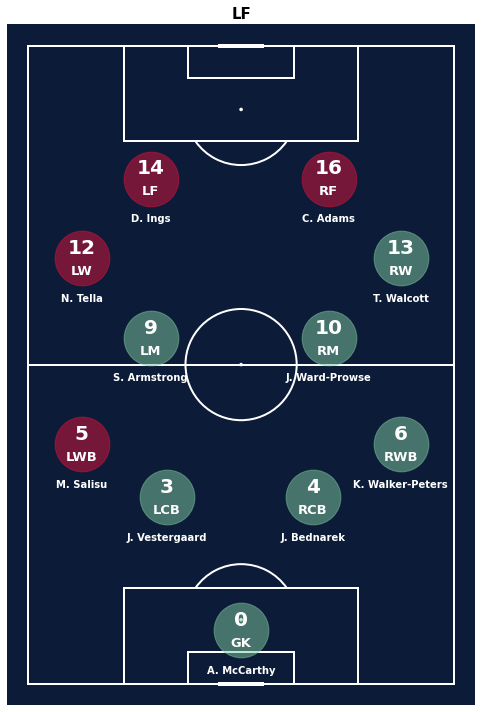

In [11]:
playerpos(players)

In [188]:
Player_list=['LCB','RCB','CM', 'RWB', 'LM', 'LWB', 'RCB', 'CF', 'RF', 'DM', 'GK']